Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from apyori import apriori
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates


Visualization Function

In [10]:
#wordcloud function
def wordcloud(data):
    wordcloud = WordCloud(background_color="white",width=2000, height=1000,max_words=500,collocations=False).generate(" ".join(data))
    plt.figure(figsize=[20,20])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Load Data

In [5]:
# Read the CSV file line by line
with open("../Data/groceries.csv", "r") as file:
    lines = file.readlines()

# Split each line into fields based on the delimiter
data = [line.strip().split(",") for line in lines]

# Determine the maximum number of fields
max_fields = max(len(line) for line in data)

# Pad each line so that they all have the same number of fields
for i, line in enumerate(data):
    data[i] = line + [np.nan] * (max_fields - len(line))

# Generate column names
column_names = [f"Item{i+1}" for i in range(max_fields)]

In [6]:
# Free memory space
del file

# Create a dataframe from the preprocessed data
Groceries_data = pd.DataFrame(data, columns=column_names)

In [7]:
Groceries_data.shape

(9835, 32)

In [8]:
Groceries_data.head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,...,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30,Item31,Item32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Groceries_data.isnull().sum()

Item1        0
Item2     2159
Item3     3802
Item4     5101
Item5     6106
Item6     6961
Item7     7606
Item8     8151
Item9     8589
Item10    8939
Item11    9185
Item12    9367
Item13    9484
Item14    9562
Item15    9639
Item16    9694
Item17    9740
Item18    9769
Item19    9783
Item20    9797
Item21    9806
Item22    9817
Item23    9821
Item24    9827
Item25    9828
Item26    9828
Item27    9829
Item28    9830
Item29    9831
Item30    9834
Item31    9834
Item32    9834
dtype: int64

Count Occurences

In [14]:
# Concatenate all columns into a single Series
all_items = Groceries_data.stack()

#replace space with underscore
all_items = all_items.str.replace(' ', '_')

# Count the occurrence of each item
item_count = all_items.value_counts()

print(item_count)

whole_milk               2513
other_vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen_utensil             4
preservation_products       2
baby_food                   1
sound_storage_medium        1
Name: count, Length: 169, dtype: int64


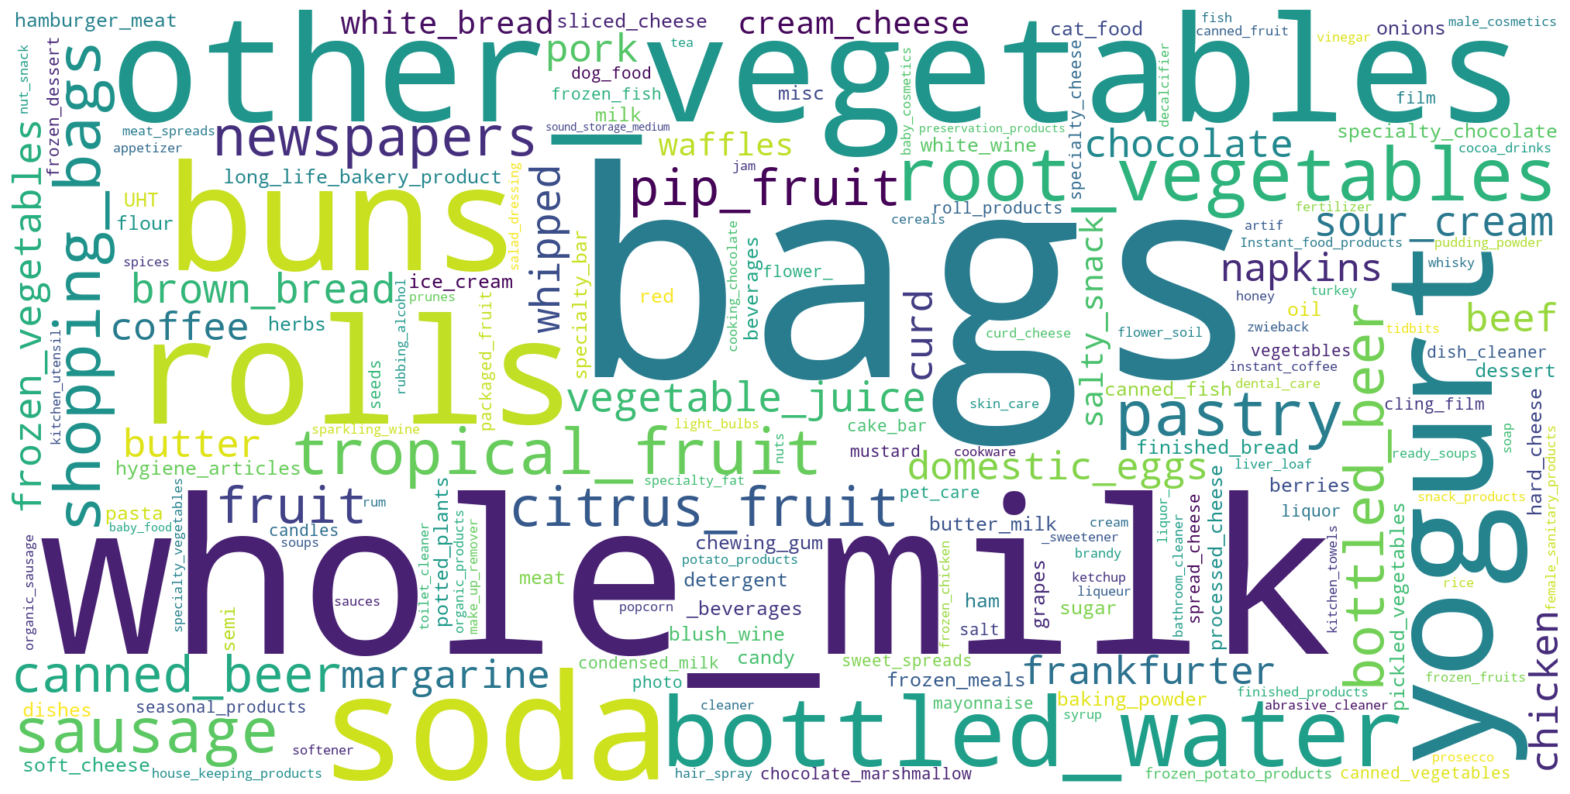

In [16]:
# Visualize wordcloud
wordcloud(item_count.to_dict())

In [17]:
# Initialize a Counter to count itemset occurrences
itemset_counter = Counter()

# Iterate over each row in the DataFrame
for index, row in Groceries_data.iterrows():
   
    # Filter out NaN values and convert the row to a frozenset to remove duplicates
    itemset = frozenset(row.dropna())
    # Increment the count for the itemset
    itemset_counter[itemset] += 1

# Create a list of dictionaries from the Counter
itemset_list = [{"Itemset": itemset, "Count": count} for itemset, count in itemset_counter.items()]

# Convert the list of dictionaries to a DataFrame
itemset_data = pd.DataFrame(itemset_list)

# Sort the DataFrame by count in descending order
itemset_data = itemset_data.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Print the DataFrame
itemset_data.head()

,Itemset,Count
0,(canned beer),260
1,(soda),156
2,(whole milk),121
3,(bottled beer),120
4,(rolls/buns),109


In [18]:
# Convert the DataFrame to a list of lists, excluding NaN values
transactions = Groceries_data.applymap(str).values.tolist()

#create a list of list
transactions = [[item for item in transaction if item != 'nan'] for transaction in transactions]

# Print the DataFrame
print(transactions)

C:\Users\Nerat\AppData\Local\Temp\ipykernel_1604\2600626700.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = Groceries_data.applymap(str).values.tolist()


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

In [24]:
#applying apriori algorithm
association_rules = apriori(transactions, min_support=0.001, min_confidence=0.2)

#convert to a list
association_results = list(association_rules)


RelationRecord(items=frozenset({'whole milk'}), support=0.25551601423487547, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'whole milk'}), confidence=0.25551601423487547, lift=1.0)])

In [22]:
rules = []
for result in association_results:
    for ordered_stat in result.ordered_statistics:
        if len(ordered_stat.items_base) > 0:
            rules.append({
                'Rule': result.items,
                'Antecedent': ', '.join(list(ordered_stat.items_base)),
                'Consequent': ', '.join(list(ordered_stat.items_add)),
                'Support': result.support,
                'Confidence': ordered_stat.confidence,
                'Lift': ordered_stat.lift
            })
rules_df = pd.DataFrame(rules)

# Remove all rows with missing values and sort by support
#rules_df = rules_df.sort_values('Support', ascending=False).dropna()

# Display the head of the DataFrame
rules_df.head()

,Rule,Antecedent,Consequent,Support,Confidence,Lift
0,"(Instant food products, hamburger meat)",Instant food products,hamburger meat,0.003050,0.379747,11.421438
1,"(Instant food products, other vegetables)",Instant food products,other vegetables,0.002745,0.341772,1.766332
2,"(Instant food products, rolls/buns)",Instant food products,rolls/buns,0.002339,0.291139,1.582838
3,"(Instant food products, root vegetables)",Instant food products,root vegetables,0.001932,0.240506,2.206511
4,"(Instant food products, soda)",Instant food products,soda,0.001932,0.240506,1.379230


Customer Segmentation

In [31]:
# Convert association rules into binary features in the transactional dataset
for rule in rules_df['Antecedent']:
    rules_df[rule] = rules_df.apply(lambda row: 1 if set(rule.split(', ')).issubset(row['Antecedent'].split(', ')) else 0, axis=1)

# Select only the features (binary columns) derived from association rules
features = rules_df[rules_df['Antecedent'].isin(rules_df.columns)]

C:\Users\Nerat\AppData\Local\Temp\ipykernel_1604\1043044750.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rules_df[rule] = rules_df.apply(lambda row: 1 if set(rule.split(', ')).issubset(row['Antecedent'].split(', ')) else 0, axis=1)
C:\Users\Nerat\AppData\Local\Temp\ipykernel_1604\1043044750.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rules_df[rule] = rules_df.apply(lambda row: 1 if set(rule.split(', ')).issubset(row['Antecedent'].split(', ')) else 0, axis=1)
C:\Users\Nerat\AppData\Local\Temp\ipykernel_1604\1043044

In [ ]:


# Select only the features (binary columns) derived from association rules
features = rules_df[rules_df['Antecedent'].isin(rules_df.columns)]

# Apply k-means clustering
num_clusters = 3  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rules_df['Cluster'] = kmeans.fit_predict(features)